<a href="https://colab.research.google.com/github/cukri/Heart_disease/blob/nowa-galaz/KlasyfikacjaChorobSerca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
df.describe() #błędne dane w przypadku RestingBP i Cholesterol, zamienić wartości 0 na NaN

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['RestingBP'].replace({0 : np.nan}, inplace = True)
df['Cholesterol'].replace({0 : np.nan}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


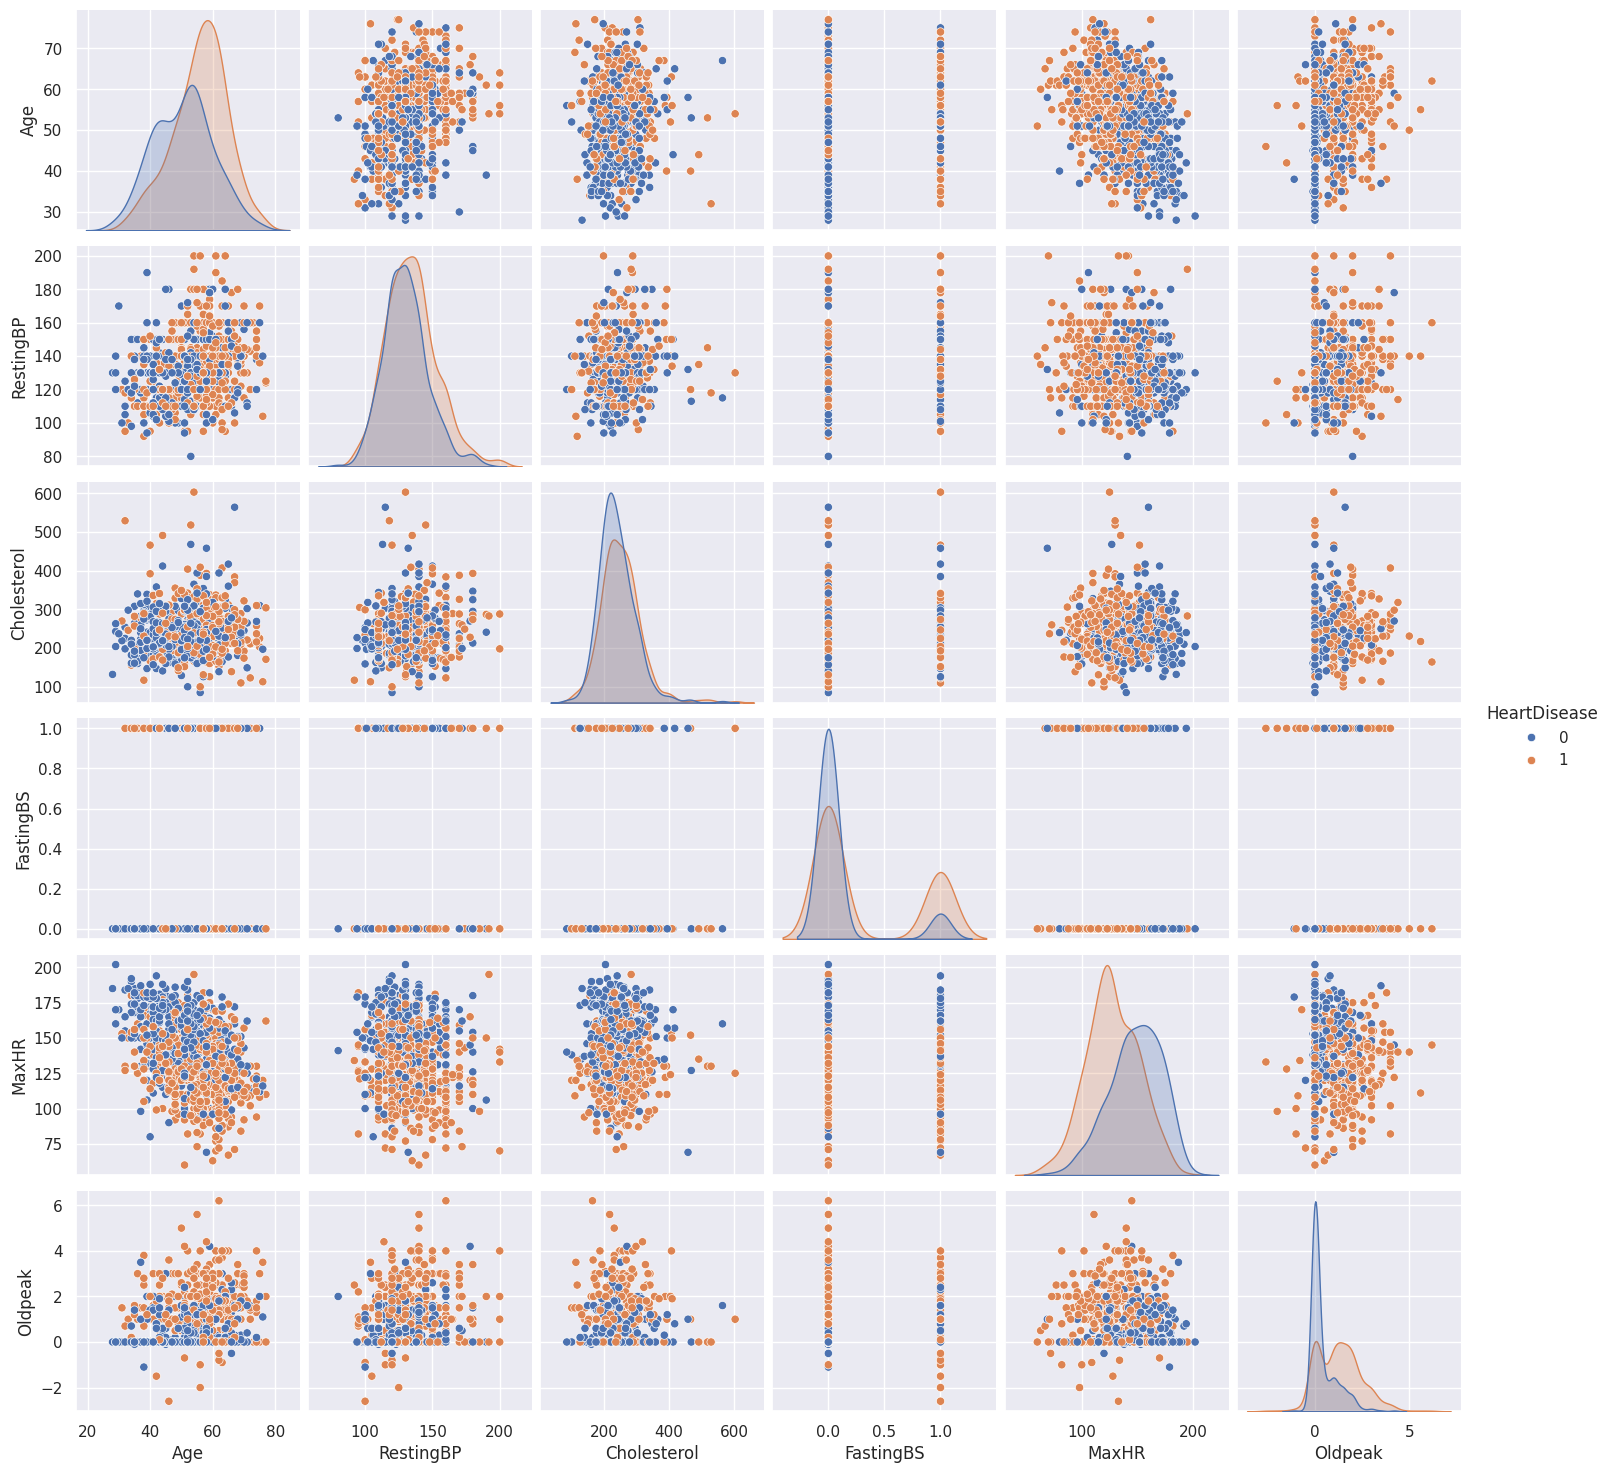

In [ ]:
sns.pairplot(data=df, hue="HeartDisease")

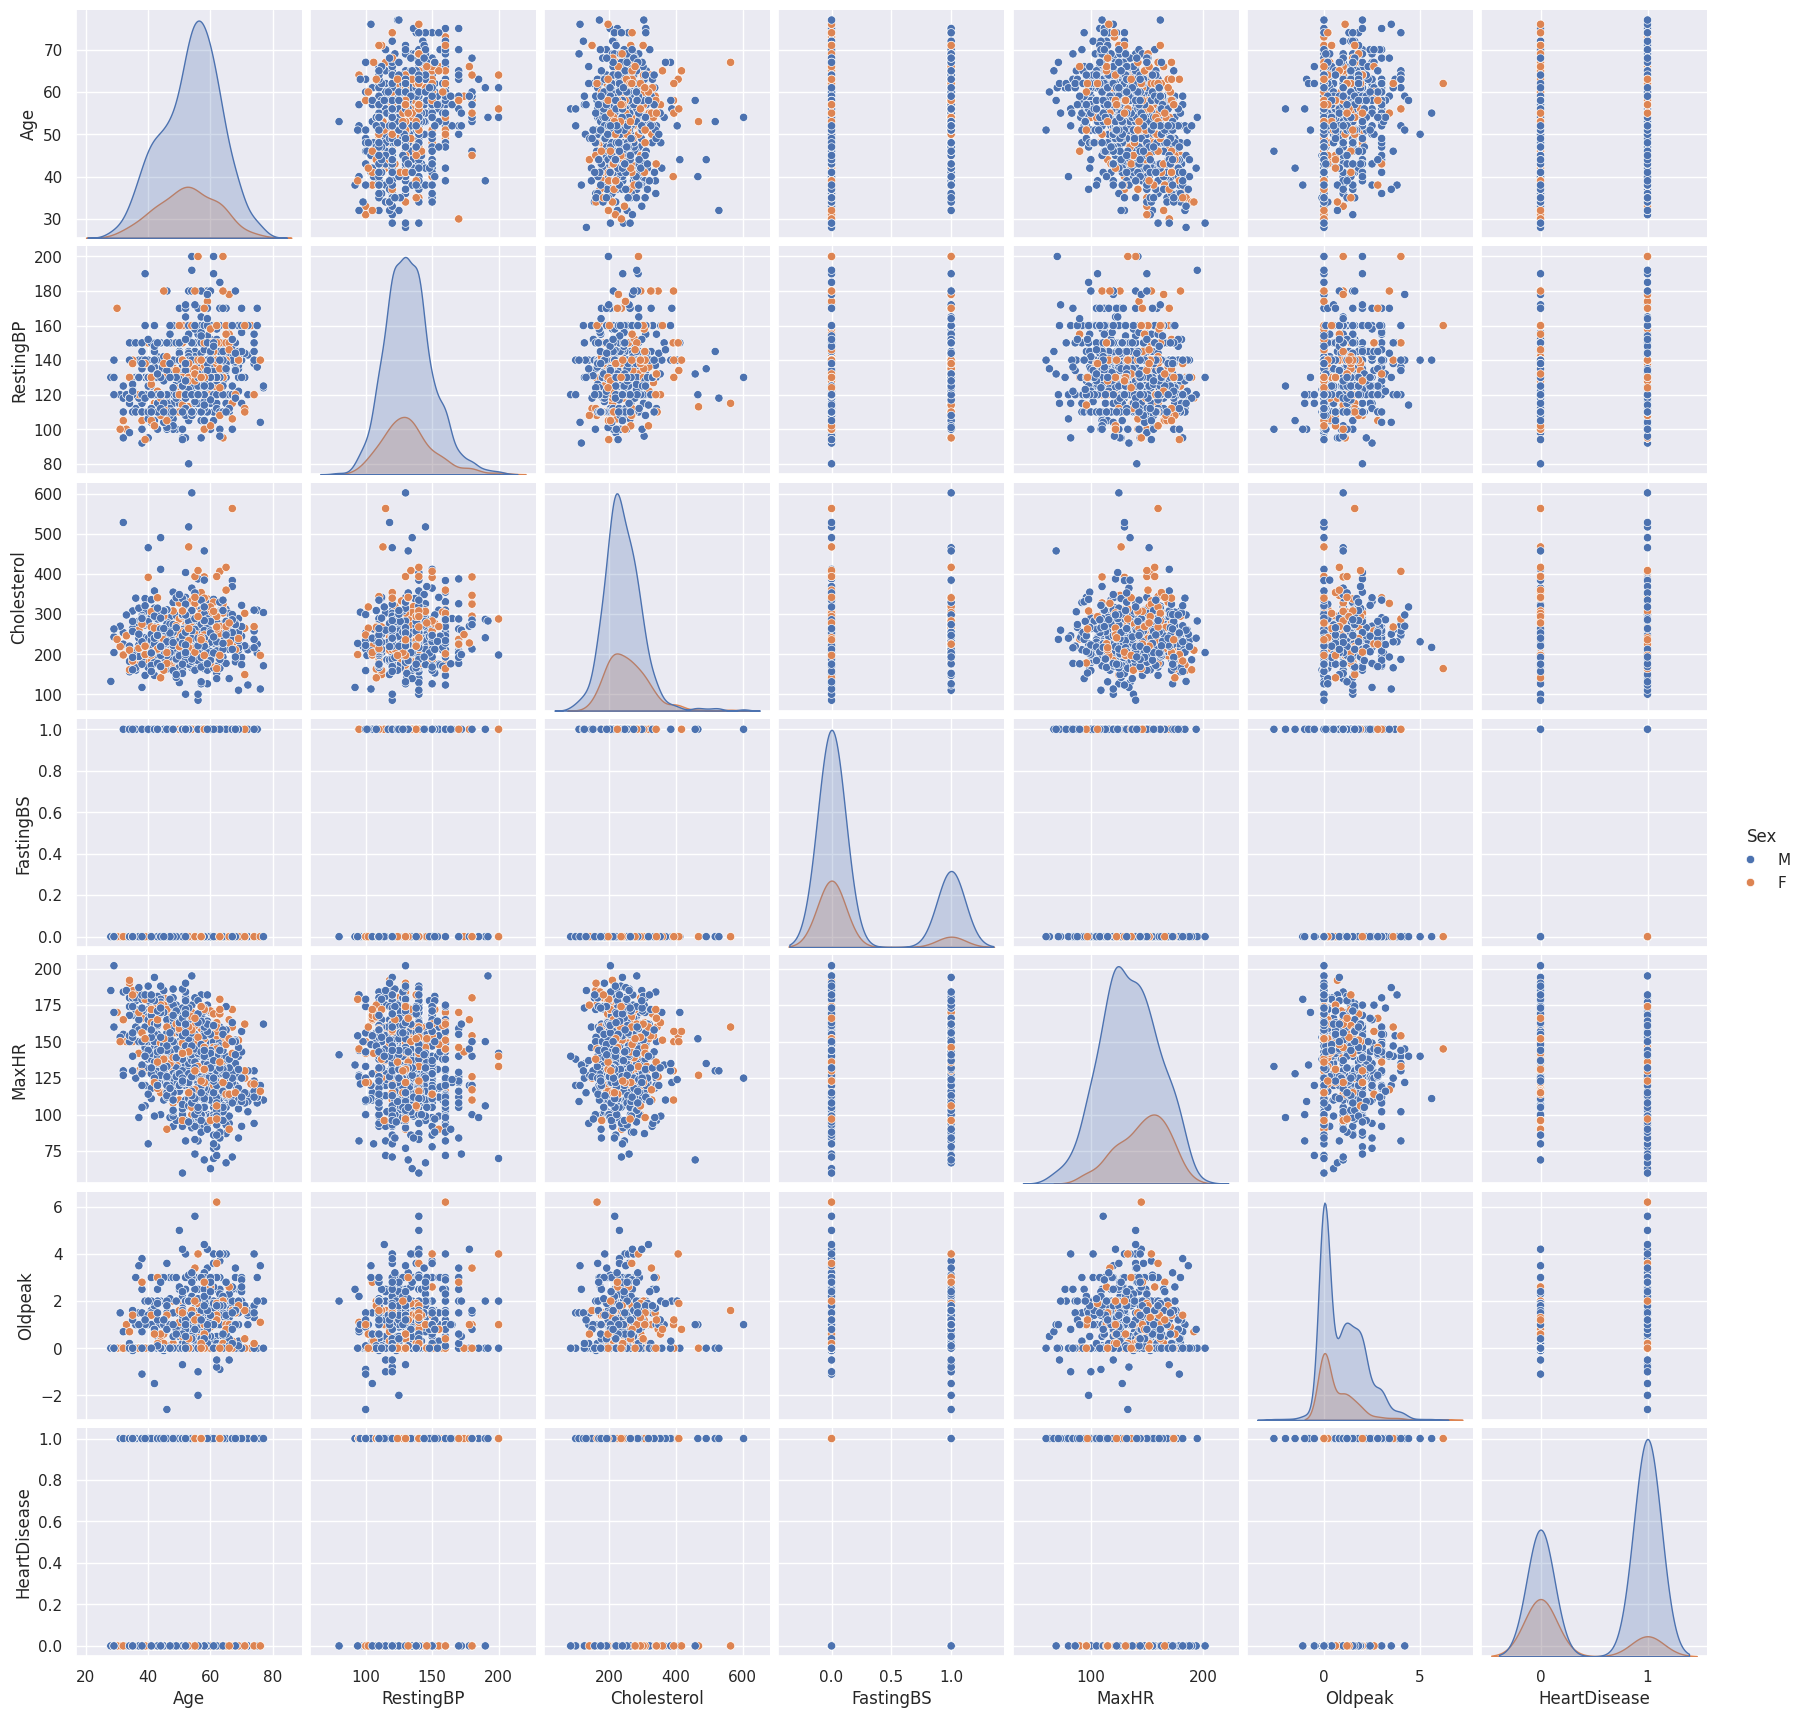

In [ ]:
sns.pairplot(data=df, hue='Sex');

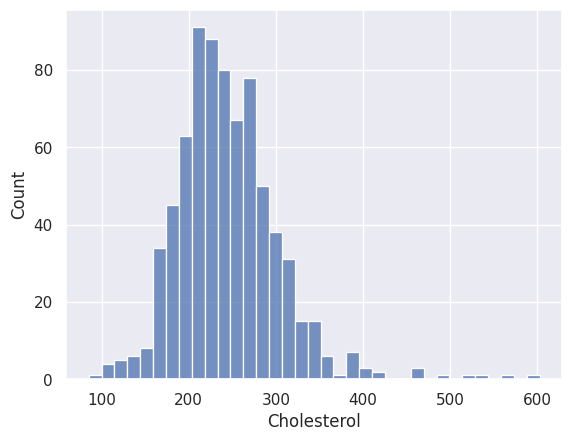

In [ ]:
sns.histplot(df['Cholesterol']);

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df[['Cholesterol','RestingBP']] = imp.fit_transform(df[['Cholesterol', 'RestingBP']])

In [ ]:
df['Cholesterol'].skew()

1.4469958858300522

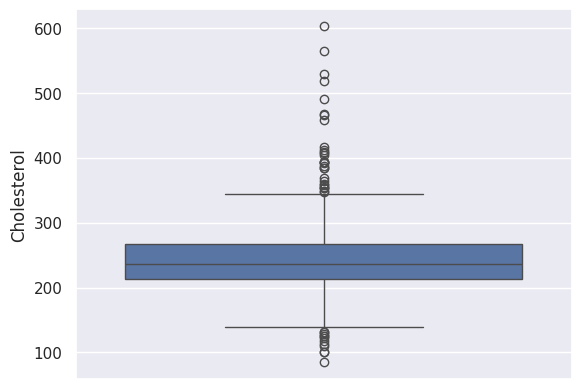

In [ ]:
sns.boxplot(df['Cholesterol']);

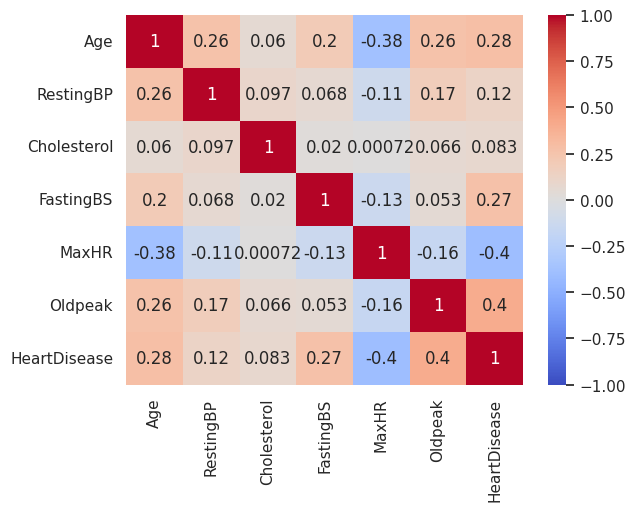

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), vmin = -1, vmax = 1, cmap='coolwarm',annot = True);

In [ ]:
q1 = df['Cholesterol'].quantile(q=0.25)
q3 = df['Cholesterol'].quantile(q=0.75)
iqr = q3-q1
q1, q3, iqr

(214.0, 267.0, 53.0)

In [ ]:
df['Cholesterol'].clip(lower=q1-1.5*iqr, upper = q3+1.5*iqr, inplace= True)

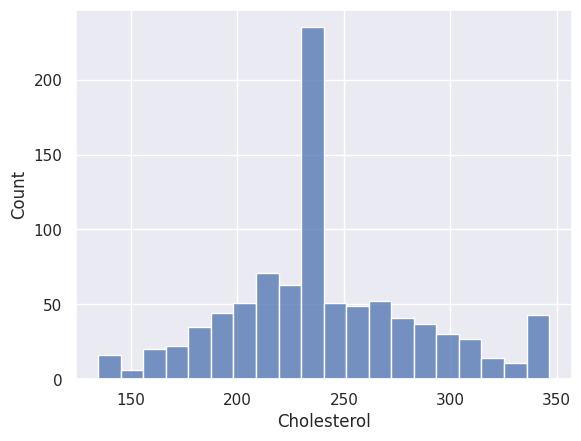

In [ ]:
sns.histplot(df['Cholesterol']);

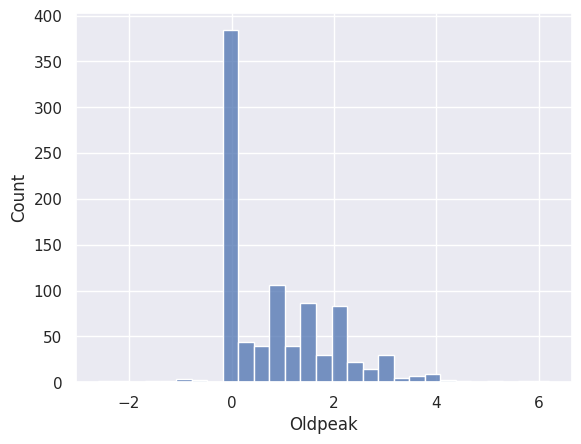

In [ ]:
sns.histplot(df['Oldpeak']);

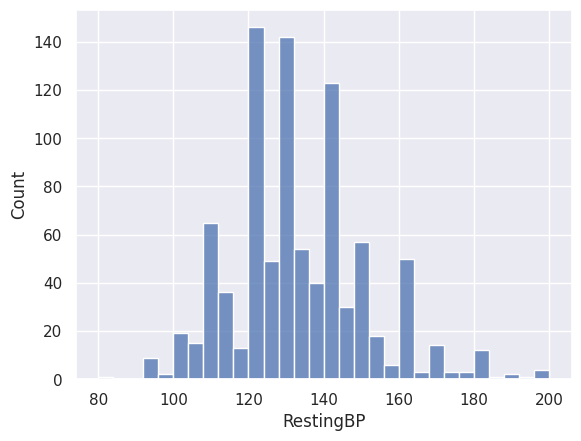

In [ ]:
sns.histplot(df['RestingBP']);

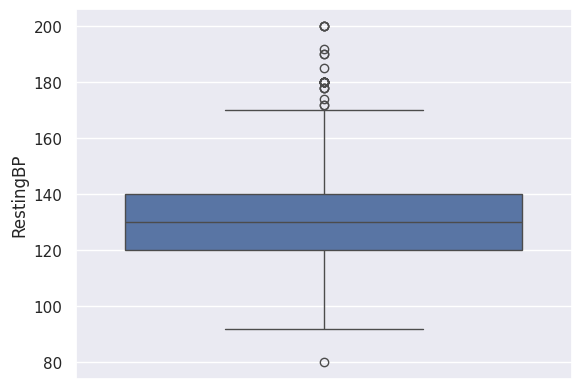

In [ ]:
sns.boxplot(df['RestingBP']);

In [ ]:
df_above_170 = df[df['RestingBP'] > 170]
print(df_above_170)


     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA      190.0        241.0          0     Normal   
123   58   F           ATA      180.0        346.5          0     Normal   
189   53   M           ASY      180.0        285.0          0         ST   
190   46   M           ASY      180.0        280.0          0         ST   
241   54   M           ASY      200.0        198.0          0     Normal   
274   45   F           ATA      180.0        295.0          0     Normal   
275   59   M           NAP      180.0        213.0          0     Normal   
278   57   F           ASY      180.0        346.5          0         ST   
365   64   F           ASY      200.0        237.0          0     Normal   
372   63   M           ASY      185.0        237.0          0     Normal   
399   61   M           NAP      200.0        237.0          1         ST   
411   54   M           ASY      180.0        237.0          1     Normal   
423   60   M

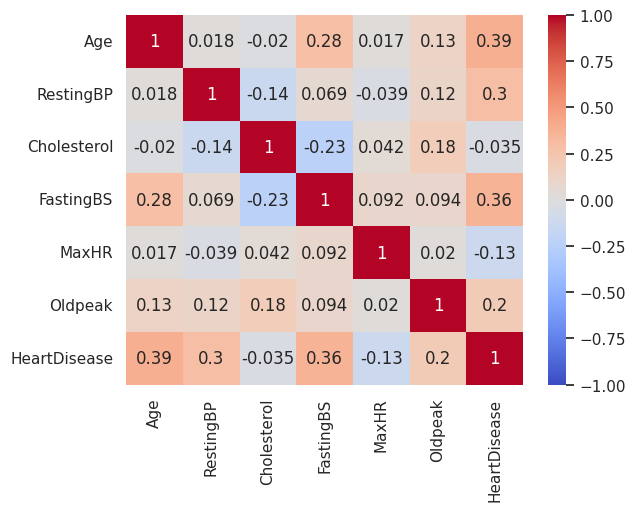

In [ ]:
sns.heatmap(df_above_170.select_dtypes(include=np.number).corr(), vmin = -1, vmax = 1, cmap='coolwarm',annot = True); #sprawdzenie korelacji w przypadku danych, których RestingBP(tętno) jest większe niż odchylenie standardowe

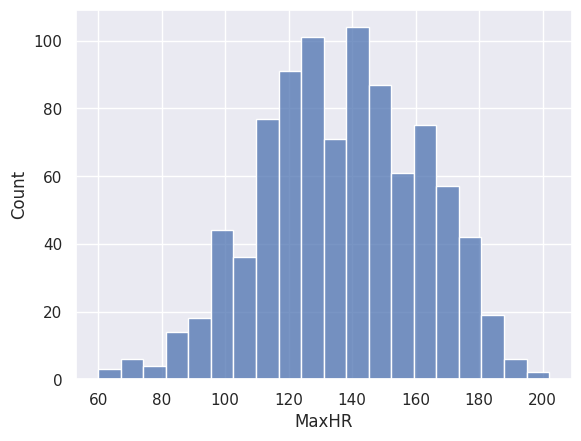

In [ ]:
sns.histplot(df['MaxHR']);

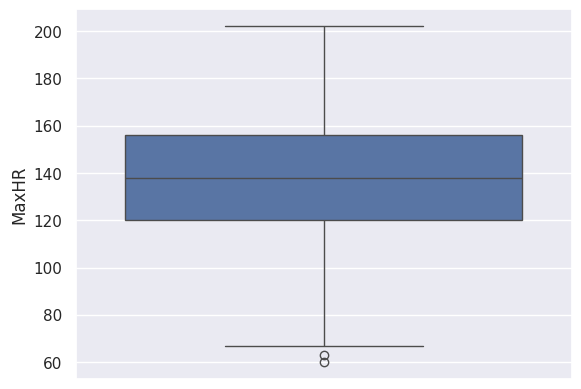

In [ ]:
sns.boxplot(df['MaxHR']);

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,0.415002,1.060551,0,1.382928,0.0,0,True,True,False,False,True,False,False,False,True
1,49,1.527329,-1.359233,0,0.754157,1.0,1,False,False,True,False,True,False,False,True,False
2,37,-0.141161,0.927352,0,-1.525138,0.0,0,True,True,False,False,False,True,False,False,True
3,48,0.303769,-0.604438,0,-1.132156,1.5,1,False,False,False,False,True,False,True,True,False
4,54,0.971166,-1.026235,0,-0.581981,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Metrics: Accuracy=0.8787, Precision=0.8628, Recall=0.9252, F1=0.8929, AUC=0.8740
Test Metrics: Accuracy=0.7880, Precision=0.8148, Recall=0.8224, F1=0.8186, AUC=0.7813


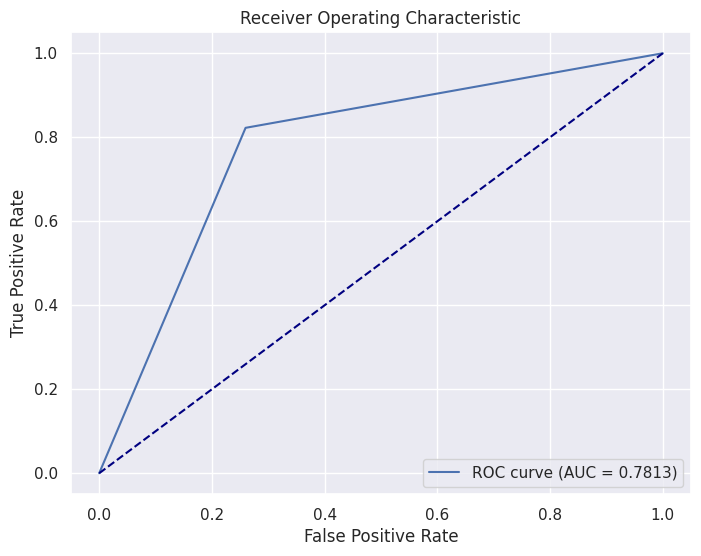

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Inicjalizacja modelu KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Trenowanie modelu
knn.fit(X_train, y_train)

# Predykcje dla zbioru treningowego i testowego
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Obliczanie AUC i krzywej ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)

    return accuracy, precision, recall, f1, auc_score, fpr, tpr

# Ewaluacja modelu na danych treningowych
train_metrics = evaluate_model(y_train, y_train_pred)

# Ewaluacja modelu na danych testowych
test_metrics = evaluate_model(y_test, y_test_pred)

# Wyświetlanie wyników
print(f'Training Metrics: Accuracy={train_metrics[0]:.4f}, Precision={train_metrics[1]:.4f}, Recall={train_metrics[2]:.4f}, F1={train_metrics[3]:.4f}, AUC={train_metrics[4]:.4f}')
print(f'Test Metrics: Accuracy={test_metrics[0]:.4f}, Precision={test_metrics[1]:.4f}, Recall={test_metrics[2]:.4f}, F1={test_metrics[3]:.4f}, AUC={test_metrics[4]:.4f}')

# Wykres ROC dla zbioru testowego
plt.figure(figsize=(8, 6))
plt.plot(test_metrics[5], test_metrics[6], label=f'ROC curve (AUC = {test_metrics[4]:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Najlepsze parametry: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Training Metrics: Accuracy=0.8556, Precision=0.8406, Recall=0.9077, F1=0.8729, AUC=0.8503
Test Metrics: Accuracy=0.8043, Precision=0.8318, Recall=0.8318, F1=0.8318, AUC=0.7990


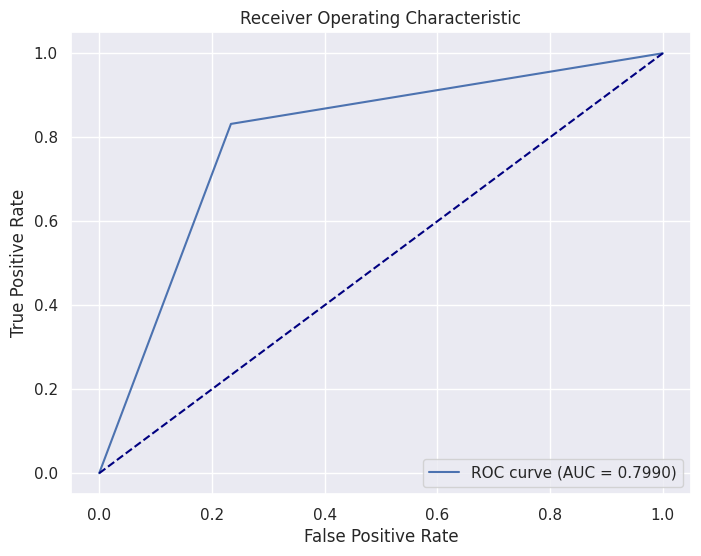

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11,13,15,17,19],
    'weights': ['uniform'],    # bo distance psuł
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall',n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Najlepsze parametry: {best_params}")

best_knn = grid_search.best_estimator_


y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)


def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)

    return accuracy, precision, recall, f1, auc_score, fpr, tpr


train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

print(f'Training Metrics: Accuracy={train_metrics[0]:.4f}, Precision={train_metrics[1]:.4f}, Recall={train_metrics[2]:.4f}, F1={train_metrics[3]:.4f}, AUC={train_metrics[4]:.4f}')
print(f'Test Metrics: Accuracy={test_metrics[0]:.4f}, Precision={test_metrics[1]:.4f}, Recall={test_metrics[2]:.4f}, F1={test_metrics[3]:.4f}, AUC={test_metrics[4]:.4f}')

plt.figure(figsize=(8,6))
plt.plot(test_metrics[5], test_metrics[6], label=f'ROC curve (AUC = {test_metrics[4]:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Best GaussianNB parameters: {'var_smoothing': 1e-12}
GaussianNB Training Metrics: Accuracy=0.8583, Precision=0.8685, Recall=0.8728, F1=0.8706, AUC=0.9229
GaussianNB Test Metrics: Accuracy=0.8478, Precision=0.9158, Recall=0.8131, F1=0.8614, AUC=0.9228


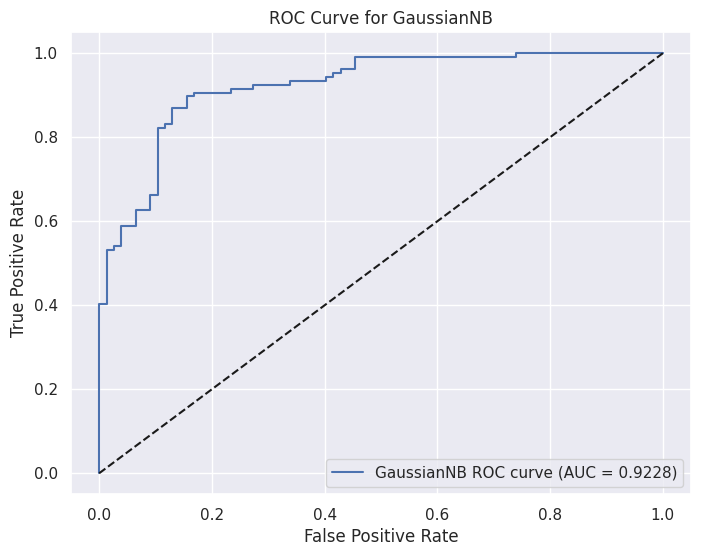

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np

# Definicja funkcji ewaluacji
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba[:, 1])
    return accuracy, precision, recall, f1, auc_score

# Parametry dla optymalizacji var_smoothing
param_grid = {'var_smoothing': np.logspace(-12, -6, num=20)}

# Tworzenie modelu GaussianNB
gnb = GaussianNB()

# GridSearchCV dla optymalizacji var_smoothing
grid_search = GridSearchCV(gnb, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Najlepszy model po optymalizacji
best_gnb = grid_search.best_estimator_

# Przewidywania na zbiorze treningowym i testowym
y_train_pred_gnb = best_gnb.predict(X_train)
y_test_pred_gnb = best_gnb.predict(X_test)

# Ocena modelu na zbiorach treningowym i testowym
train_metrics_gnb = evaluate_model(y_train, y_train_pred_gnb, best_gnb.predict_proba(X_train))
test_metrics_gnb = evaluate_model(y_test, y_test_pred_gnb, best_gnb.predict_proba(X_test))

# Wyniki
print("Best GaussianNB parameters:", grid_search.best_params_)
print("GaussianNB Training Metrics: Accuracy={:.4f}, Precision={:.4f}, Recall={:.4f}, F1={:.4f}, AUC={:.4f}".format(*train_metrics_gnb))
print("GaussianNB Test Metrics: Accuracy={:.4f}, Precision={:.4f}, Recall={:.4f}, F1={:.4f}, AUC={:.4f}".format(*test_metrics_gnb))

# Wykres ROC dla GaussianNB
fpr, tpr, _ = roc_curve(y_test, best_gnb.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GaussianNB ROC curve (AUC = {test_metrics_gnb[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend(loc='lower right')
plt.show()


GaussianNB (with adjusted threshold) Training Metrics: Accuracy=0.8542, Precision=0.8296, Recall=0.9227, F1=0.8737, AUC=0.9229
GaussianNB (with adjusted threshold) Test Metrics: Accuracy=0.8641, Precision=0.8942, Recall=0.8692, F1=0.8815, AUC=0.9228


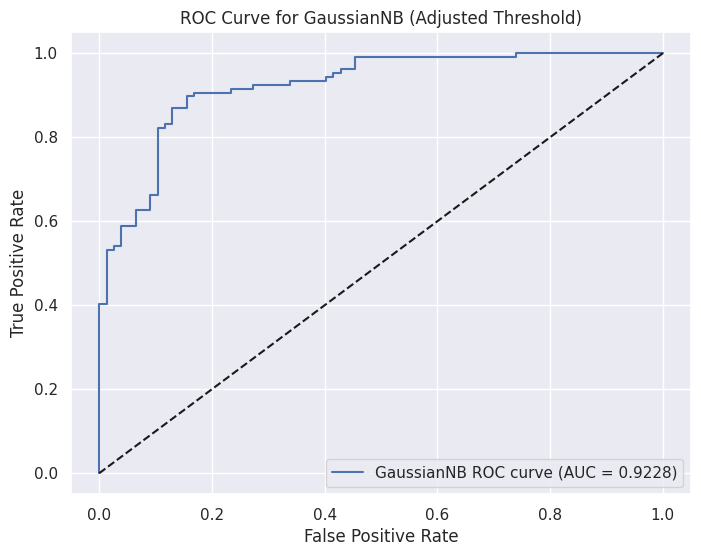

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Trening modelu
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# Przewidywania na zbiorze treningowym i testowym
y_train_pred_gnb = gaussian_nb.predict(X_train)
y_test_pred_gnb = gaussian_nb.predict(X_test)

# Przewidywanie prawdopodobieństw
y_train_proba_gnb = gaussian_nb.predict_proba(X_train)[:, 1]
y_test_proba_gnb = gaussian_nb.predict_proba(X_test)[:, 1]

# Dostosowanie progu (threshold) dla większego recall
threshold = 0.1  # Obniżenie progu
y_train_pred_gnb_adjusted = (y_train_proba_gnb >= threshold).astype(int)
y_test_pred_gnb_adjusted = (y_test_proba_gnb >= threshold).astype(int)

# Funkcja oceny modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba)
    return accuracy, precision, recall, f1, auc_score

# Ocena modelu z dostosowanym progiem
train_metrics_gnb = evaluate_model(y_train, y_train_pred_gnb_adjusted, y_train_proba_gnb)
test_metrics_gnb = evaluate_model(y_test, y_test_pred_gnb_adjusted, y_test_proba_gnb)

print("GaussianNB (with adjusted threshold) Training Metrics: Accuracy={:.4f}, Precision={:.4f}, Recall={:.4f}, F1={:.4f}, AUC={:.4f}".format(*train_metrics_gnb))
print("GaussianNB (with adjusted threshold) Test Metrics: Accuracy={:.4f}, Precision={:.4f}, Recall={:.4f}, F1={:.4f}, AUC={:.4f}".format(*test_metrics_gnb))

# Wykres ROC dla modelu z dostosowanym progiem
fpr, tpr, _ = roc_curve(y_test, y_test_proba_gnb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GaussianNB ROC curve (AUC = {test_metrics_gnb[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB (Adjusted Threshold)')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best DecisionTreeClassifier parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier (Best Params) Training Metrics: Accuracy=0.8379, Precision=0.8026, Recall=0.9327, F1=0.8627, AUC=0.8719
DecisionTreeClassifier (Best Params) Test Metrics: Accuracy=0.7935, Precision=0.8224, Recall=0.8224, F1=0.8224, AUC=0.8172


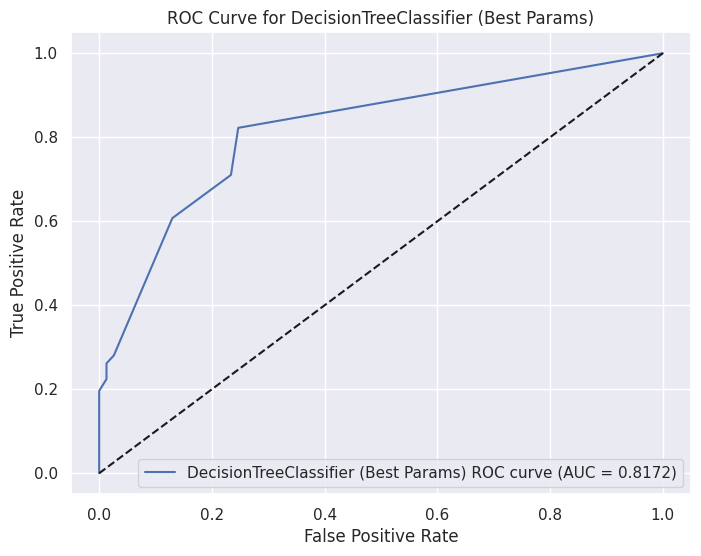

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Parametry do przeszukania
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]  # Zmieniono 'auto' na 'sqrt' i 'log2'
}

# Inicjalizacja modelu drzewa decyzyjnego
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_
print(f'Best DecisionTreeClassifier parameters: {best_params}')

# Model z najlepszymi parametrami
best_dt = grid_search.best_estimator_

# Predykcje i ocena z najlepszymi parametrami
y_train_pred_best_dt = best_dt.predict(X_train)
y_test_pred_best_dt = best_dt.predict(X_test)

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba[:, 1])
    return accuracy, precision, recall, f1, auc_score

# Ocena modelu z najlepszymi parametrami
train_metrics_best_dt = evaluate_model(y_train, y_train_pred_best_dt, best_dt.predict_proba(X_train))
test_metrics_best_dt = evaluate_model(y_test, y_test_pred_best_dt, best_dt.predict_proba(X_test))

# Wyniki z najlepszymi parametrami
print(f'DecisionTreeClassifier (Best Params) Training Metrics: Accuracy={train_metrics_best_dt[0]:.4f}, Precision={train_metrics_best_dt[1]:.4f}, Recall={train_metrics_best_dt[2]:.4f}, F1={train_metrics_best_dt[3]:.4f}, AUC={train_metrics_best_dt[4]:.4f}')
print(f'DecisionTreeClassifier (Best Params) Test Metrics: Accuracy={test_metrics_best_dt[0]:.4f}, Precision={test_metrics_best_dt[1]:.4f}, Recall={test_metrics_best_dt[2]:.4f}, F1={test_metrics_best_dt[3]:.4f}, AUC={test_metrics_best_dt[4]:.4f}')

# Wykres ROC dla DecisionTreeClassifier z najlepszymi parametrami
fpr, tpr, _ = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'DecisionTreeClassifier (Best Params) ROC curve (AUC = {test_metrics_best_dt[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DecisionTreeClassifier (Best Params)')
plt.legend(loc='lower right')
plt.show()



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best RandomForestClassifier parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RandomForestClassifier (Best Params) Training Metrics: Accuracy=0.8801, Precision=0.8700, Recall=0.9177, F1=0.8932, AUC=0.9569
RandomForestClassifier (Best Params) Test Metrics: Accuracy=0.8424, Precision=0.8824, Recall=0.8411, F1=0.8612, AUC=0.9280


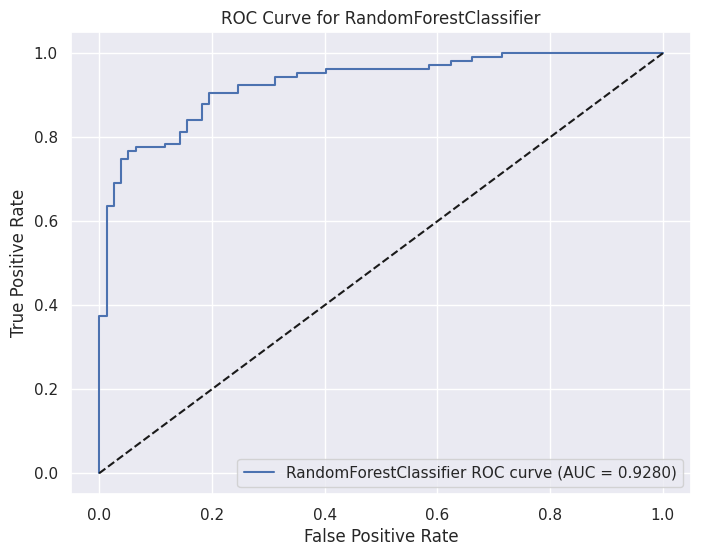

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Inicjalizacja modelu lasu losowego
rf = RandomForestClassifier(random_state=42)

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba[:, 1])
    return accuracy, precision, recall, f1, auc_score

# Parametry do przeszukania
param_grid = {
    'n_estimators': [50, 100],           # liczba drzew w lesie
    'max_depth': [3, 5, None],            # maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],          # minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2],            # minimalna liczba próbek na liściu
    'max_features': ['sqrt', 'log2']    # liczba cech do rozważenia przy każdym podziale
}

# GridSearchCV z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_
print(f'Best RandomForestClassifier parameters: {best_params}')

# Model z najlepszymi parametrami
best_rf = grid_search.best_estimator_

# Predykcje i ocena modelu z najlepszymi parametrami na zbiorze treningowym i testowym
y_train_pred_best_rf = best_rf.predict(X_train)
y_test_pred_best_rf = best_rf.predict(X_test)

# Ocena modelu
train_metrics_best_rf = evaluate_model(y_train, y_train_pred_best_rf, best_rf.predict_proba(X_train))
test_metrics_best_rf = evaluate_model(y_test, y_test_pred_best_rf, best_rf.predict_proba(X_test))

# Wyniki z najlepszymi parametrami
print(f'RandomForestClassifier (Best Params) Training Metrics: Accuracy={train_metrics_best_rf[0]:.4f}, Precision={train_metrics_best_rf[1]:.4f}, Recall={train_metrics_best_rf[2]:.4f}, F1={train_metrics_best_rf[3]:.4f}, AUC={train_metrics_best_rf[4]:.4f}')
print(f'RandomForestClassifier (Best Params) Test Metrics: Accuracy={test_metrics_best_rf[0]:.4f}, Precision={test_metrics_best_rf[1]:.4f}, Recall={test_metrics_best_rf[2]:.4f}, F1={test_metrics_best_rf[3]:.4f}, AUC={test_metrics_best_rf[4]:.4f}')

# Wykres ROC dla RandomForestClassifier
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier ROC curve (AUC = {test_metrics_best_rf[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RandomForestClassifier parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
RandomForestClassifier (Best Params) Training Metrics: Accuracy=0.9469, Precision=0.9351, Recall=0.9701, F1=0.9523, AUC=0.9926
RandomForestClassifier (Best Params) Test Metrics: Accuracy=0.8641, Precision=0.8868, Recall=0.8785, F1=0.8826, AUC=0.9254


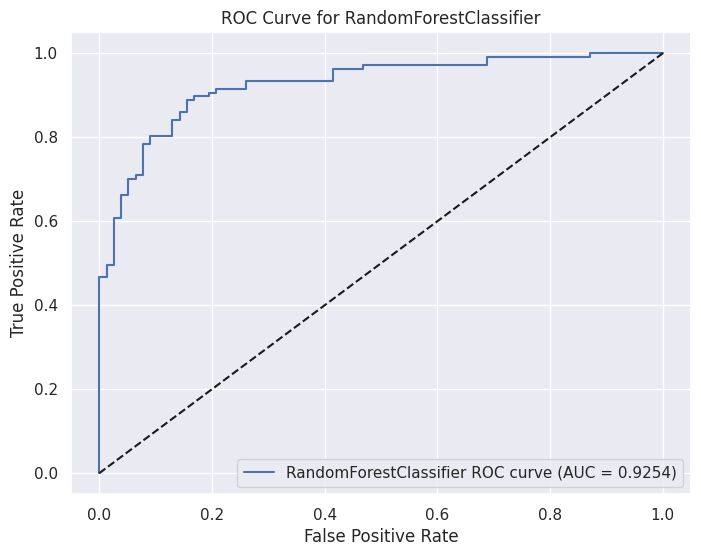

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Inicjalizacja modelu lasu losowego
rf = RandomForestClassifier(random_state=42)

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba[:, 1])
    return accuracy, precision, recall, f1, auc_score

# Parametry do przeszukania
param_grid = {
    'n_estimators': [50, 100, 150],           # liczba drzew w lesie
    'max_depth': [3, 5, 8, None],            # maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],          # minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2, 5],            # minimalna liczba próbek na liściu
    'max_features': ['sqrt', 'log2']    # liczba cech do rozważenia przy każdym podziale
}

# GridSearchCV z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_
print(f'Best RandomForestClassifier parameters: {best_params}')

# Model z najlepszymi parametrami
best_rf = grid_search.best_estimator_

# Predykcje i ocena modelu z najlepszymi parametrami na zbiorze treningowym i testowym
y_train_pred_best_rf = best_rf.predict(X_train)
y_test_pred_best_rf = best_rf.predict(X_test)

# Ocena modelu
train_metrics_best_rf = evaluate_model(y_train, y_train_pred_best_rf, best_rf.predict_proba(X_train))
test_metrics_best_rf = evaluate_model(y_test, y_test_pred_best_rf, best_rf.predict_proba(X_test))

# Wyniki z najlepszymi parametrami
print(f'RandomForestClassifier (Best Params) Training Metrics: Accuracy={train_metrics_best_rf[0]:.4f}, Precision={train_metrics_best_rf[1]:.4f}, Recall={train_metrics_best_rf[2]:.4f}, F1={train_metrics_best_rf[3]:.4f}, AUC={train_metrics_best_rf[4]:.4f}')
print(f'RandomForestClassifier (Best Params) Test Metrics: Accuracy={test_metrics_best_rf[0]:.4f}, Precision={test_metrics_best_rf[1]:.4f}, Recall={test_metrics_best_rf[2]:.4f}, F1={test_metrics_best_rf[3]:.4f}, AUC={test_metrics_best_rf[4]:.4f}')

# Wykres ROC dla RandomForestClassifier
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier ROC curve (AUC = {test_metrics_best_rf[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


Best LogisticRegression parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression (Best Params) Training Metrics: Accuracy=0.8678, Precision=0.8671, Recall=0.8953, F1=0.8810, AUC=0.9294
LogisticRegression (Best Params) Test Metrics: Accuracy=0.8641, Precision=0.9100, Recall=0.8505, F1=0.8792, AUC=0.9258


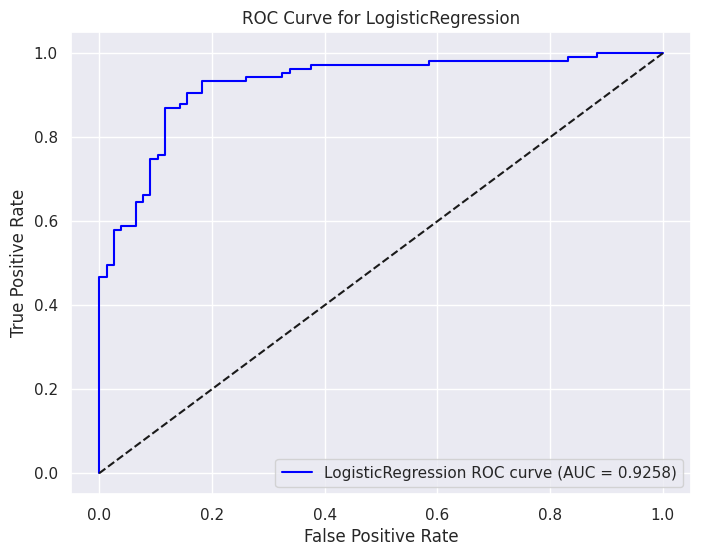

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba)
    return accuracy, precision, recall, f1, auc_score

# Definicja modelu
logreg = LogisticRegression(max_iter=2000)

# Definicja siatki parametrów
param_grid = [
    {'penalty': ['l1'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100]},            # tylko L1, bez l1_ratio
    {'penalty': ['l2'], 'solver': ['lbfgs', 'saga', 'newton-cg'], 'C': [0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}
]

# GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(X_train, y_train)

# Najlepsze parametry
best_params = grid_search.best_params_
print(f"Best LogisticRegression parameters: {best_params}")

# Trenowanie modelu z najlepszymi parametrami
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)

# Predykcja na zbiorze treningowym i testowym
y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)
y_train_proba = best_logreg.predict_proba(X_train)[:, 1]
y_test_proba = best_logreg.predict_proba(X_test)[:, 1]

# Ewaluacja na zbiorze treningowym
train_accuracy, train_precision, train_recall, train_f1, train_auc = evaluate_model(y_train, y_train_pred, y_train_proba)

# Ewaluacja na zbiorze testowym
test_accuracy, test_precision, test_recall, test_f1, test_auc = evaluate_model(y_test, y_test_pred, y_test_proba)

# Wyświetlenie wyników
print(f"LogisticRegression (Best Params) Training Metrics: Accuracy={train_accuracy:.4f}, Precision={train_precision:.4f}, Recall={train_recall:.4f}, F1={train_f1:.4f}, AUC={train_auc:.4f}")
print(f"LogisticRegression (Best Params) Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1={test_f1:.4f}, AUC={test_auc:.4f}")

# Wykres ROC dla zbioru testowego
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LogisticRegression ROC curve (AUC = {test_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Linie przerywana, reprezentująca linię losową
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression')
plt.legend(loc='lower right')
plt.show()



Wnioski
Regresja logistyczna jest bardziej stabilna pod względem metryk treningowych i testowych, co może świadczyć o mniejszym ryzyku nadmiernego dopasowania.
Random Forest osiąga wyższą czułość i lepsze wyniki na zbiorze treningowym, co może być przydatne, jeśli głównym celem jest wykrycie wszystkich pozytywnych przypadków (np. w przypadku istotnych klinicznie klas).
Ostateczny wybór modelu zależy od priorytetów:

Jeśli zależy na maksymalizacji precyzji (zmniejszeniu fałszywych alarmów), regresja logistyczna może być lepszym wyborem.
Jeśli zależy na maksymalizacji czułości (wykryciu jak największej liczby pozytywnych przypadków), Random Forest może być bardziej odpowiedni.
Oba modele mają podobny AUC, co oznacza, że oba dobrze rozróżniają między klasami, ale różnią się w szczegółowych metrykach.

In [ ]:
df_without_cholesterol = df_encoded.drop(columns=['Cholesterol'])
X_without_cholesterol = df_without_cholesterol.drop('HeartDisease', axis=1)
y_without_cholesterol = df_without_cholesterol['HeartDisease']

X_train_without_cholesterol, X_test_without_cholesterol, y_train_without_cholesterol, y_test_without_cholesterol = train_test_split(
    X_without_cholesterol, y_without_cholesterol, test_size=0.2, random_state=42)

In [ ]:
df_without_cholesterol

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,0.415002,0,1.382928,0.0,0,True,True,False,False,True,False,False,False,True
1,49,1.527329,0,0.754157,1.0,1,False,False,True,False,True,False,False,True,False
2,37,-0.141161,0,-1.525138,0.0,0,True,True,False,False,False,True,False,False,True
3,48,0.303769,0,-1.132156,1.5,1,False,False,False,False,True,False,True,True,False
4,54,0.971166,0,-0.581981,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,-1.253488,0,-0.188999,1.2,1,True,False,False,True,True,False,False,True,False
914,68,0.637468,1,0.164684,3.4,1,True,False,False,False,True,False,False,True,False
915,57,-0.141161,0,-0.857069,1.2,1,True,False,False,False,True,False,True,True,False
916,57,-0.141161,0,1.461525,0.0,1,False,True,False,False,False,False,False,True,False


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best RandomForestClassifier parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
RandomForestClassifier (Best Params) Training Metrics: Accuracy=0.9264, Precision=0.9161, Recall=0.9526, F1=0.9340, AUC=0.9869
RandomForestClassifier (Best Params) Test Metrics: Accuracy=0.8424, Precision=0.8750, Recall=0.8505, F1=0.8626, AUC=0.9203


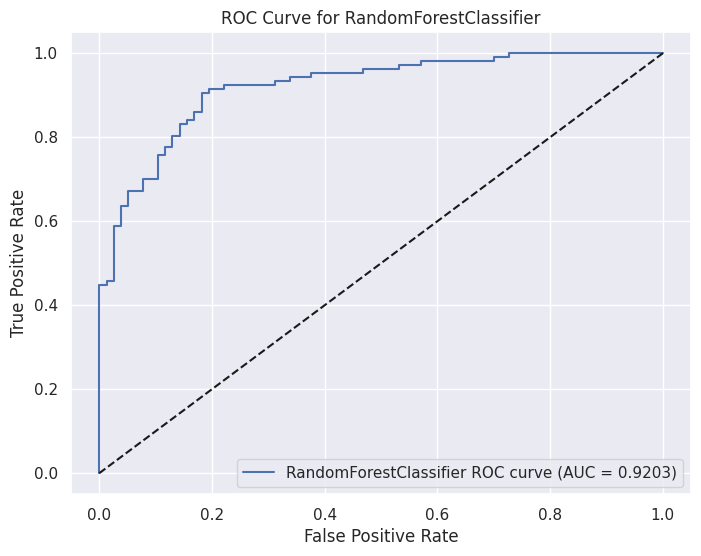

In [ ]:
# Inicjalizacja modelu lasu losowego
rf = RandomForestClassifier(random_state=42)

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba[:, 1])
    return accuracy, precision, recall, f1, auc_score

# Parametry do przeszukania
param_grid = {
    'n_estimators': [50, 100, 150],           # liczba drzew w lesie
    'max_depth': [3, 5, 8, None],             # maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],          # minimalna liczba próbek do podziału
    'min_samples_leaf': [1, 2, 5],            # minimalna liczba próbek na liściu
    'max_features': ['sqrt', 'log2']          # liczba cech do rozważenia przy każdym podziale
}

# GridSearchCV z 5-krotną walidacją krzyżową
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search.fit(X_train_without_cholesterol, y_train_without_cholesterol)

# Najlepsze parametry
best_params = grid_search.best_params_
print(f'Best RandomForestClassifier parameters: {best_params}')

# Model z najlepszymi parametrami
best_rf = grid_search.best_estimator_

# Predykcje i ocena modelu z najlepszymi parametrami na zbiorze treningowym i testowym
y_train_pred_best_rf = best_rf.predict(X_train_without_cholesterol)
y_test_pred_best_rf = best_rf.predict(X_test_without_cholesterol)

# Ocena modelu
train_metrics_best_rf = evaluate_model(y_train_without_cholesterol, y_train_pred_best_rf, best_rf.predict_proba(X_train_without_cholesterol))
test_metrics_best_rf = evaluate_model(y_test_without_cholesterol, y_test_pred_best_rf, best_rf.predict_proba(X_test_without_cholesterol))

# Wyniki z najlepszymi parametrami
print(f'RandomForestClassifier (Best Params) Training Metrics: Accuracy={train_metrics_best_rf[0]:.4f}, Precision={train_metrics_best_rf[1]:.4f}, Recall={train_metrics_best_rf[2]:.4f}, F1={train_metrics_best_rf[3]:.4f}, AUC={train_metrics_best_rf[4]:.4f}')
print(f'RandomForestClassifier (Best Params) Test Metrics: Accuracy={test_metrics_best_rf[0]:.4f}, Precision={test_metrics_best_rf[1]:.4f}, Recall={test_metrics_best_rf[2]:.4f}, F1={test_metrics_best_rf[3]:.4f}, AUC={test_metrics_best_rf[4]:.4f}')

# Wykres ROC dla RandomForestClassifier
fpr, tpr, _ = roc_curve(y_test_without_cholesterol, best_rf.predict_proba(X_test_without_cholesterol)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestClassifier ROC curve (AUC = {test_metrics_best_rf[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()


LogisticRegression (L2, lbfgs) Training Metrics: Accuracy=0.8692, Precision=0.8692, Recall=0.8953, F1=0.8821, AUC=0.9294
LogisticRegression (L2, lbfgs) Test Metrics: Accuracy=0.8587, Precision=0.9091, Recall=0.8411, F1=0.8738, AUC=0.9250


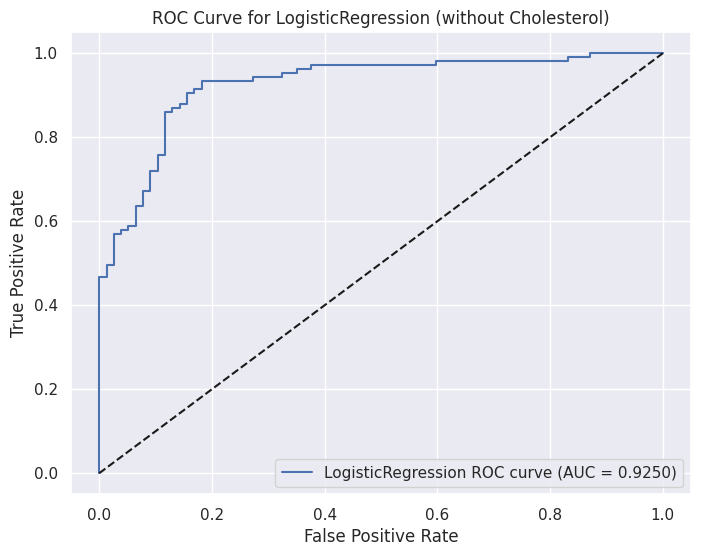

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Inicjalizacja modelu regresji logistycznej z L2 regularizacją i solverem lbfgs
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500, C=1.0, random_state=42)

# Funkcja do ewaluacji modelu
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba[:, 1])
    return accuracy, precision, recall, f1, auc_score

# Dopasowanie modelu do danych treningowych bez cholesterolu
log_reg.fit(X_train_without_cholesterol, y_train_without_cholesterol)

# Predykcje i ocena modelu na zbiorze treningowym i testowym
y_train_pred_log_reg = log_reg.predict(X_train_without_cholesterol)
y_test_pred_log_reg = log_reg.predict(X_test_without_cholesterol)

# Ocena modelu
train_metrics_log_reg = evaluate_model(y_train_without_cholesterol, y_train_pred_log_reg, log_reg.predict_proba(X_train_without_cholesterol))
test_metrics_log_reg = evaluate_model(y_test_without_cholesterol, y_test_pred_log_reg, log_reg.predict_proba(X_test_without_cholesterol))

# Wyniki
print(f'LogisticRegression (L2, lbfgs) Training Metrics: Accuracy={train_metrics_log_reg[0]:.4f}, Precision={train_metrics_log_reg[1]:.4f}, Recall={train_metrics_log_reg[2]:.4f}, F1={train_metrics_log_reg[3]:.4f}, AUC={train_metrics_log_reg[4]:.4f}')
print(f'LogisticRegression (L2, lbfgs) Test Metrics: Accuracy={test_metrics_log_reg[0]:.4f}, Precision={test_metrics_log_reg[1]:.4f}, Recall={test_metrics_log_reg[2]:.4f}, F1={test_metrics_log_reg[3]:.4f}, AUC={test_metrics_log_reg[4]:.4f}')

# Wykres ROC dla Logistic Regression
fpr, tpr, _ = roc_curve(y_test_without_cholesterol, log_reg.predict_proba(X_test_without_cholesterol)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LogisticRegression ROC curve (AUC = {test_metrics_log_reg[4]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LogisticRegression (without Cholesterol)')
plt.legend(loc='lower right')
plt.show()
